In [37]:
import GOES as GOES
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# from cartopy.feature import NaturalEarthFeature
import numpy as np
import netCDF4 as nc
import xarray as xr

In [3]:
flist = GOES.download('goes16', 'ABI-L2-ACHAF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = '20200101-153000', DateTimeFin = '20200101-155000', 
#                       channel = ['13'],
                      path_out='./data/')

flist_cod = GOES.download('goes16', 'ABI-L2-CODF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = '20200101-153000', DateTimeFin = '20200101-155000', 
#                       channel = ['13'],
                      path_out='./data/')

Files:
  OR_ABI-L2-ACHAF-M6_G16_s20200011530217_e20200011539525_c20200011541391.nc 100% 1.5MB 1s
  OR_ABI-L2-ACHAF-M6_G16_s20200011540217_e20200011549525_c20200011551340.nc 100% 1.5MB 2s
Files:
  OR_ABI-L2-CODF-M6_G16_s20200011530217_e20200011539525_c20200011541483.nc 100% 7.4MB 16s
  OR_ABI-L2-CODF-M6_G16_s20200011540217_e20200011549525_c20200011551394.nc 100% 7.4MB 8s


COD


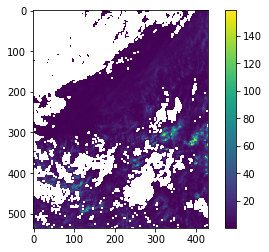

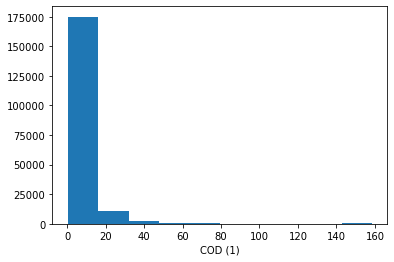

In [4]:
file = flist[0]
file_cod = flist_cod[0]

# classify based on rules of Ormes (2017)

ds_nc = nc.Dataset(file_cod)
var_name = list(ds_nc.variables.keys())[0]
print(var_name)

# set the map domain
domain = [-50.0,-30.0,-5.0,15.0] #->  (x0, x1, y0, y1) 

# reads the file
ds = GOES.open_dataset(file_cod)

# get image with the coordinates of corners of their pixels
var, LonCor, LatCor = ds.image(var_name, lonlat='corner', domain=domain)

# get information about data
sat = ds.attribute('platform_ID')
unit = ds_nc.variables[var_name].units


# band = ds.variable('band_id').data[0]
# fig, ax = plt.figure()
plt.imshow(var.data)
plt.colorbar()

plt.show()

plt.hist(var.data.flatten())
plt.xlabel(f'{var_name} ({unit})')
plt.show()

In [26]:
cth = xr.open_dataset(file)
cth

In [22]:
cod = xr.open_dataset(file_cod)
cod

<xarray.Dataset>
Dimensions:                                    (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2712, y: 2712)
Coordinates: (12/14)
    t                                          datetime64[ns] ...
  * y                                          (y) float32 0.1518 ... -0.1518
  * x                                          (x) float32 -0.1518 ... 0.1518
    y_image                                    float32 ...
    x_image                                    float32 ...
    cod_product_wavelength                     float32 ...
    ...                                         ...
    quantitative_local_zenith_angle            float32 ...
    day_solar_zenith_angle                     float32 ...
    night_solar_zenith_angle                   float32 ...
    twilight_solar_zenith_angle                float32 ...
    day_algorithm_solar_zenith_angle           float32 ...
    night_algorithm_solar_zenith_angle         float32 ...
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/38)
    COD                                        (y, x) float32 ...
    DQF                                        (y, x) float32 ...
    time_bounds                                (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                     int32 ...
    y_image_bounds                             (number_of_image_bounds) float32 ...
    x_image_bounds                             (number_of_image_bounds) float32 ...
    ...                                         ...
    percent_uncorrectable_L0_errors            float32 ...
    daytime_cloud_pixels                       float64 ...
    nighttime_cloud_pixels                     float64 ...
    percent_daytime_pixels                     float32 ...
    percent_nighttime_pixels                   float32 ...
    percent_terminator_pixels                  float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-01-01T15:30:21.7Z
    time_coverage_end:         2020-01-01T15:39:52.5Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        df4ea1ab-6835-47f8-a6e4-0c69cf644938

In [29]:
# Interpolated data
# new_lon = np.linspace(ds.lon[0], ds.lon[-1], ds.dims["lon"] * 4)

# new_lat = np.linspace(ds.lat[0], ds.lat[-1], ds.dims["lat"] * 4)

dsi = cth.interp(x=cod.x, y=cod.y)
dsi

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2712, y: 2712)
Coordinates: (12/16)
    t                                       datetime64[ns] ...
    y_image                                 float32 ...
    x_image                                 float32 ...
    local_zenith_angle                      float32 ...
    solar_zenith_angle                      float32 ...
  * x                                       (x) float32 -0.1518 ... 0.1518
    ...                                      ...
    quantitative_local_zenith_angle         float32 65.0
    day_solar_zenith_angle                  float32 65.0
    night_solar_zenith_angle                float32 90.0
    twilight_solar_zenith_angle             float32 77.5
    day_algorithm_solar_zenith_angle        float32 82.0
    night_algorithm_solar_zenith_angle      float32 82.0
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/23)
    HT                                      (y, x) float32 nan nan ... nan nan
    DQF                                     (y, x) float32 nan nan ... nan nan
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    algorithm_product_version_container     int32 ...
    local_zenith_angle_bounds               (number_of_LZA_bounds) float32 ...
    solar_zenith_angle_bounds               (number_of_SZA_bounds) float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    cloud_pixels                            float64 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-01-01T15:40:21.7Z
    time_coverage_end:         2020-01-01T15:49:52.5Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        cc00ef61-a22e-49b5-849f-093afcd13b0f

In [39]:
cth

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 1086, y: 1086)
Coordinates:
    t                                       datetime64[ns] 2020-01-01T15:45:0...
  * y                                       (y) float32 0.1519 ... -0.1519
  * x                                       (x) float32 -0.1519 ... 0.1519
    y_image                                 float32 0.0
    x_image                                 float32 0.0
    local_zenith_angle                      float32 70.0
    solar_zenith_angle                      float32 180.0
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/23)
    HT                                      (y, x) float32 nan nan ... nan nan
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 -2147483647
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    algorithm_product_version_container     int32 -2147483647
    local_zenith_angle_bounds               (number_of_LZA_bounds) float32 0....
    solar_zenith_angle_bounds               (number_of_SZA_bounds) float32 0....
    percent_uncorrectable_GRB_errors        float64 0.0
    percent_uncorrectable_L0_errors         float64 0.0
    cloud_pixels                            float64 1.585e+07
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-01-01T15:40:21.7Z
    time_coverage_end:         2020-01-01T15:49:52.5Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        cc00ef61-a22e-49b5-849f-093afcd13b0f

In [15]:
for file in flist_cod:
    ds_nc = nc.Dataset(file)
    print(ds_nc.dimensions['x'].size, ds_nc.dimensions['y'].size)

for file in flist:
    ds_nc = nc.Dataset(file)
    print(ds_nc.dimensions['x'].size, ds_nc.dimensions['y'].size)


2712 2712
2712 2712
1086 1086
1086 1086


In [19]:
# # Brian Blaylock
# # Requres `s3fs`
# # Website: https://s3fs.readthedocs.io/en/latest/
# # In Anaconda, download via conda-forge.

# import s3fs

# # Use the anonymous credentials to access public data
# fs = s3fs.S3FileSystem(anon=True)

# # List contents of GOES-16 bucket.
# fs.ls('s3://noaa-goes16/') # ->  Full Disk (ABI-L2-ACHAF) | CONUS (ABI-L2-ACHAC) | Mesoscale (ABI-L2-ACHAM)


# # List specific files of GOES-17 CONUS data (multiband format) on a certain hour
# # Note: the `s3://` is not required
# # 'noaa-goes16/ABI-L2-ACHAC/2020/001' -- 'sattelite/product/year/julianday/hour'
# # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
# files = np.array(fs.ls('noaa-goes16/ABI-L2-ACHAC/2020/001/15'))
# print(files) #-> gives an image ~every 5 min. 

# # Download the first file, and rename it the same name (without the directory structure)
# fs.get(files[0], files[0].split('/')[-1])


['noaa-goes16/ABI-L2-ACHAC/2020/001/15/OR_ABI-L2-ACHAC-M6_G16_s20200011501183_e20200011503556_c20200011505585.nc'
 'noaa-goes16/ABI-L2-ACHAC/2020/001/15/OR_ABI-L2-ACHAC-M6_G16_s20200011506183_e20200011508556_c20200011510405.nc'
 'noaa-goes16/ABI-L2-ACHAC/2020/001/15/OR_ABI-L2-ACHAC-M6_G16_s20200011511183_e20200011513556_c20200011515423.nc'
 'noaa-goes16/ABI-L2-ACHAC/2020/001/15/OR_ABI-L2-ACHAC-M6_G16_s20200011516183_e20200011518556_c20200011521128.nc'
 'noaa-goes16/ABI-L2-ACHAC/2020/001/15/OR_ABI-L2-ACHAC-M6_G16_s20200011521183_e20200011523556_c20200011525351.nc'
 'noaa-goes16/ABI-L2-ACHAC/2020/001/15/OR_ABI-L2-ACHAC-M6_G16_s20200011526183_e20200011528556_c20200011530530.nc'
 'noaa-goes16/ABI-L2-ACHAC/2020/001/15/OR_ABI-L2-ACHAC-M6_G16_s20200011531183_e20200011533556_c20200011535585.nc'
 'noaa-goes16/ABI-L2-ACHAC/2020/001/15/OR_ABI-L2-ACHAC-M6_G16_s20200011536183_e20200011538556_c20200011540519.nc'
 'noaa-goes16/ABI-L2-ACHAC/2020/001/15/OR_ABI-L2-ACHAC-M6_G16_s20200011541183_e202000115

[None]